# Linear Regression (Univariate)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.linear_model import LinearRegression
from matplotlib import cm
import MachineLearning as ml

# Read the Dataset

In [2]:
dataframe = pd.read_csv("./Data/ex1data1.txt", delimiter=',', header = 0)
# otterrò una struttura dati chiamata pandas dataframe
# l'indice è fittizio e può essere usato per le queries
dataframe_type = type(dataframe)
dataframe_type

pandas.core.frame.DataFrame

In [3]:
dataframe

,Population of City (in 10K),Profit (in 10K $)
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


# Separiamo l'input dall'output

In [4]:
x = dataframe["Population of City (in 10K)"].values
y = dataframe["Profit (in 10K $)"].values
# c'è però ancora un indice fittizio
# il che significa che è ancora una porzione di quella struttura dati
type(x)
# x è una series (sarebbe un vettore indicizzato)
# ho aggiunto alle prime due assegnazioni .values

numpy.ndarray

In [5]:
# vediamo la shape dei dati
print(x.shape)
print(y.shape)
# Produce come output
#(97,)
#(97,)
# che implicitamente impone il numero delle colonne pari a 1 e non mi andrà bene in futuro
#per cui uso reshape

(97,)
(97,)


In [6]:
# -1 per le righe = prendi tutte le righe  (quindi 97 nel mio caso)
# 1 per le colonne lo forzo io
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [10]:
print(x.shape)
print(y.shape)

(97, 1)
(97, 1)


# Scatter Plot

In [11]:
#visualizziamo i nostri dati in uno scatter plot

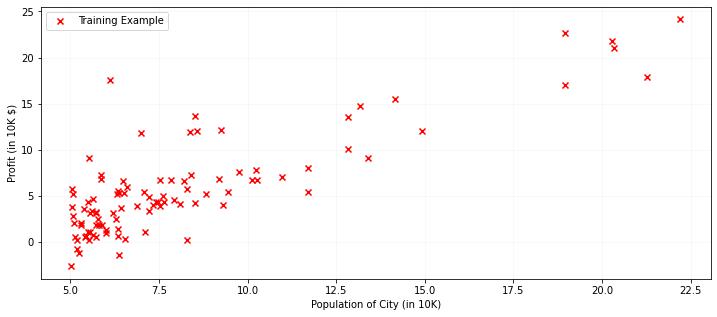

In [12]:
plt.figure(figsize = (12,5)) # dichiaro l'ambiente per disegnare
# (12,5) vuole prima colonne e poi righe
plt.scatter(x,y, marker='x', c='red', label='Training Example')
plt.xlabel("Population of City (in 10K)")
plt.ylabel("Profit (in 10K $)")
plt.grid(alpha=0.1)
plt.legend()
plt.show()

# Hypothesis Function

$$\large h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$$

where $x^{(i)}$ represents the i-th training example



### ora riscrivo la mia funzione di ipotesi vettorizzata

$$\large h_{\theta} (X) = X_{\theta}$$

$$\large X : m \times n$$

$$\large \theta : n \times 1$$

$$\large h_{\theta}(x) : m \times 1$$

è un prodotto vettoriale  $(m \times n) (n \times 1)$  

where $X$ is called **Designed Matrix**

$$\large X = \begin{bmatrix}1 & x_{1}^{(0)} \\
                            1 & x_{1}^{(1)} \\
                            \vdots & \vdots \\
                            1 & x_{1}^{(m)}
                           \end{bmatrix}$$

$$\large \theta = \begin{bmatrix}\theta_0 \\ 
                                 \theta_1      
                                 \end{bmatrix}$$

# Cost Function

Non-vectorized cost function
$$\large J(\theta_{0}, \theta_1) = \frac{1}{2m}\sum_{i=0}^{m-1} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^{2} = \frac{1}{2m}\sum_{i=0}^{m-1} $$

**Vectorized** Cost Function

$$\large J(\theta) = \frac{1}{2m} (X\theta - Y)^{T} (X\theta - Y)$$

# Teorema della Elena

$$\large LaElena tiene na cosa bona: \\ Le amiche $$

## Add the intercept term

In [13]:
x = np.c_[np.ones(x.shape[0]), x]
# se volessi aggiungere in coda:
#np.r_

In [14]:
x

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

# Cost Function implementation

In [15]:
def costLoopBased(x,y, theta= np.zeros((x.shape[1],1))):
    m = x.shape[0]
    n = x.shape[1]
    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()
    for i in range(m): # iterate on over all the input example
        h = 0
        for j in range (n): # iterate over each input feature
            
            h += theta[j]*x[i][j]
            
        J += (h - y[i])**2 ##individual loss
    J = J/(2*m),3
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [16]:
cost_lb, etime_lb= costLoopBased(x,y)
print(cost_lb)

[32.073]


In [17]:
def costVectorial(x,y, theta= np.zeros((x.shape[1],1))):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    J = (x.dot(theta) - y).T.dot((x.dot(theta) - y))
    J = J/(2*m)

    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J[0],3), np.round(elapsed_time,3)

In [18]:
cost_v, etime_v= costVectorial(x,y)
print(etime_v)

0.582


In [19]:
def costNumpy(x,y, theta= np.zeros((x.shape[1],1))):
    m = x.shape[0]

    J = 0
    
    elapsed_time = 0
    elapsed_time -= time.time()

    # strategia ibrida
    # in ordine
    
    # vettore colonna x*theta - vettore colonna y -> ottengo vettore colonna [97 x 1]
    hyphotesys = x.dot(theta) 
    # faccio il quadrato, sempre [97 x 1]
    square = np.square(hyphotesys - y)
    # sommo tutti e 97 gli elementi -> ottengo scalare [1 x 1]
    J = np.sum(square)
    J = J/(2*m)
    
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi
    
    return np.round(J,3), np.round(elapsed_time,3)

In [20]:
cost_np, etime_np= costNumpy(x,y)
print(cost_np, etime_np)


32.073 0.167


# BENCHMARK

In [21]:
n_iter = 1000
etime_lb_counter = 0
etime_vectorized_counter = 0
etime_numpy_counter = 0

for i in range(n_iter):
    _, etime_1 = costLoopBased(x,y)
    _, etime_2 = costVectorial(x,y)
    _, etime_3 = costNumpy(x,y)
    
    etime_lb_counter +=  etime_1
    etime_vectorized_counter += etime_2
    etime_numpy_counter += etime_3

etime_lb_avg = np.round(etime_lb_counter/n_iter, 3)
etime_vectorized_avg = np.round(etime_vectorized_counter/n_iter, 3)
etime_numpy_avg = np.round(etime_numpy_counter/n_iter, 3)
    

In [22]:
print ('Benchmarking over {} iterations'.format(n_iter))
print('1) loop based averaged execution time: {}'.format(etime_lb_avg))
print('2) vectorized averaged execution time: {}'.format(etime_vectorized_avg))
print('3) numpy based averaged execution time: {}'.format(etime_numpy_avg))

Benchmarking over 1000 iterations
1) loop based averaged execution time: 0.965
2) vectorized averaged execution time: 0.009
3) numpy based averaged execution time: 0.009


# PLOT $J(\theta_1)$ with $\theta_0 = 0 $

In [23]:
n_theta_samples = 10
start = -10
stop = 10
# per campionare uso linspace per equamente distanziati
#sample evenly distributed values for theta_1 (theta_0 = 0)
sample_theta = np.linspace(start,stop, n_theta_samples)

costs = np.zeros((n_theta_samples,1))
hypothesis = []

for i in range(n_theta_samples):
    
    theta = np.array([0, sample_theta[i]]).reshape(-1,1)
    hypothesis.append(x.dot(theta))
    
    costs[i],_ = costVectorial(x,y, theta)
    

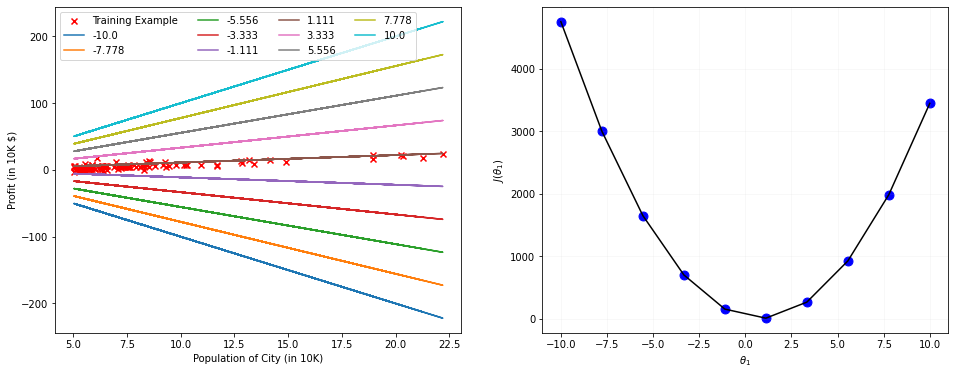

In [24]:
#stiamo creando i subplot
#assegno a fig, mi servirà
fig = plt.figure(figsize = (16,6)) # dichiaro l'ambiente per disegnare

# 121 = 1 riga e 2 colonne e va al 1 
ax1 = fig.add_subplot(121)
# 121 = 1 riga e 2 colonne e va al 2
ax2 = fig.add_subplot(122)

#rispetto a prima dobbiamo mettere x[:,1] perchè ho aggiunto la colonna di 1
ax1.scatter(x[:,1],y,marker='x', c='red', label='Training Example')
for i in range(n_theta_samples):
    ax1.plot(x[:,1], hypothesis[i], label = str(np.round(sample_theta[i],3)))
ax1.set_xlabel("Population of City (in 10K)")
ax1.set_ylabel("Profit (in 10K $)")
ax1.legend(loc = 'upper left', ncol=4)

ax2.scatter(sample_theta.reshape(-1,1),costs, marker='o', c='blue', s=80)
ax2.plot(sample_theta.reshape(-1,1),costs, c='black')
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$J(\theta_1)$')
ax2.grid(alpha=0.1)
plt.show()

# BATCH GRADIENT DESCENT (Loop Based)

$$\large h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$$

$$\large J(\theta_{0}, \theta_1) = \frac{1}{2m}\sum_{i=0}^{m-1} (h_{\theta}(x^{(i)})-y^{(i)})^{2} = \frac{1}{2m}\sum_{i=0}^{m-1}(\theta_{0} + \theta_{1}x^{(i)}-y^{(i)})^{2} $$

$$\large \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} = \frac{1}{m}\sum_{i=0}^{m-1}(\large h_{\theta} (x^{(i)})-y^{(i)}) $$

$$\large \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} = \frac{1}{m}\sum_{i=0}^{m-1}(\large h_{\theta} (x^{(i)})-y^{(i)}) x^{(i)} $$

Repeat{
$$\large \theta_0 := \theta_0 \frac{\alpha}{m}\sum_{i =0}^{m-1}(\large h_{\theta}(x^{(i)}) - y^{(i)}) $$

$$\large \theta_1 := \theta_1 \frac{\alpha}{m}\sum_{i =0}^{m-1}(\large h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)} $$

}

In [25]:
def gradientDescentLoop(x, y, theta = np.zeros((x.shape[1],1)), alpha = 0.003, max_iters = 20000, early = False, epsilon = 0.00001):
    
    m = x.shape[0]
    n = x.shape[1]
    J_history = np.zeros((max_iters,1))
    theta_history = []

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costLoopBased(x,y, theta_gd)
        theta_history.append(np.copy(theta_gd))
        h = np.zeros((m,1))
        partial = np.zeros((n,1))
        
        for i in range(m):
            for j in range(n):
                h[i] += theta_gd[j]*x[i][j]
            
            for j in range(n):
                partial[j] += (h[i] - y[i])*x[i][j]
                
        #simultaneously update each parameter        
        for j in range(n):
            theta_gd[j] = theta_gd[j] - (alpha/m)*partial[j]
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [26]:
theta_gd, cost_history, gd_elapsed_time, theta_history= gradientDescentLoop(x,y)

In [27]:
theta_history

[array([[0.],
        [0.]]),
 array([[0.01751741],
        [0.19598655]]),
 array([[0.03018462],
        [0.34368205]]),
 array([[0.03919835],
        [0.45499848]]),
 array([[0.04546007],
        [0.53890946]]),
 array([[0.04964891],
        [0.60217511]]),
 array([[0.05227648],
        [0.649888  ]]),
 array([[0.05372819],
        [0.68588452]]),
 array([[0.05429437],
        [0.71305472]]),
 array([[0.05419374],
        [0.73357578]]),
 array([[0.05359107],
        [0.74908782]]),
 array([[0.05261048],
        [0.76082638]]),
 array([[0.05134548],
        [0.76972226]]),
 array([[0.04986651],
        [0.77647662]]),
 array([[0.04822664],
        [0.78161769]]),
 array([[0.04646583],
        [0.7855434 ]]),
 array([[0.04461421],
        [0.7885535 ]]),
 array([[0.04269445],
        [0.79087383]]),
 array([[0.04072366],
        [0.7926745 ]]),
 array([[0.03871469],
        [0.79408367]]),
 array([[0.03667726],
        [0.79519788]]),
 array([[0.03461867],
        [0.79608986]]),
 arr

# PLOT $J({\theta}) $ over the Gradient Descent iterations

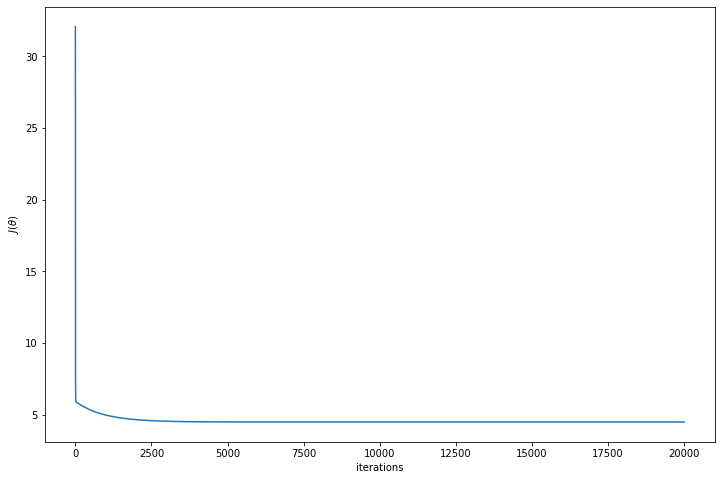

In [28]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(cost_history.shape[0])+1, cost_history, label = r'$J({\theta})$');
plt.xlabel("iterations")
plt.ylabel(r'$J({\theta})$')
plt.show()

In [29]:
cost_history

array([[32.073],
       [20.758],
       [14.337],
       ...,
       [ 4.477],
       [ 4.477],
       [ 4.477]])

# Scikit-Learn Linear Regression

In [30]:
linear_reg = LinearRegression()
linear_reg.fit(x,y)
theta_sklearn = np.array([linear_reg.intercept_[0], linear_reg.coef_[0][1]]).reshape(-1,1)
theta_sklearn

array([[-3.89578088],
       [ 1.19303364]])

In [31]:
print(theta_gd)

[[-3.89570127]
 [ 1.19302565]]


In [32]:
a = ml.linear_regression_scikit(x,y)

In [34]:
x

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

# Plot the field hypothesis

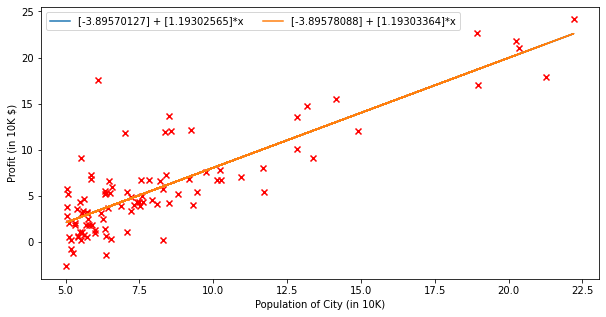

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x[:,1], y, marker = 'x', c='r')
plt.plot(x[:,1], x.dot(theta_gd), label = '{} + {}*x'.format(theta_gd[0], theta_gd[1]))
plt.plot(x[:,1], x.dot(theta_sklearn), label = '{} + {}*x'.format(theta_sklearn[0], theta_sklearn[1]))
plt.xlabel("Population of City (in 10K)")
plt.ylabel("Profit (in 10K $)")
plt.legend(loc = 'upper left', ncol= 4)
plt.show()

# Countour Plot

In [30]:
B0 = np.linspace(-80,80, 50)
B1 = np.linspace(-10,10, 50)
# ottengo coppie (x,y)
xx,yy = np.meshgrid(B0,B1, indexing = 'xy')

In [31]:
z = np.zeros((B0.shape[0], B1.shape[0]))

#ndenumerate itera sulle multidimensioni
for (i,j), v in np.ndenumerate(z):  #i è la coppia di coordinate e j è il valore di z
    z[i,j],_ = costVectorial(x,y, theta = [[xx[i,j]], [yy[i,j]]])

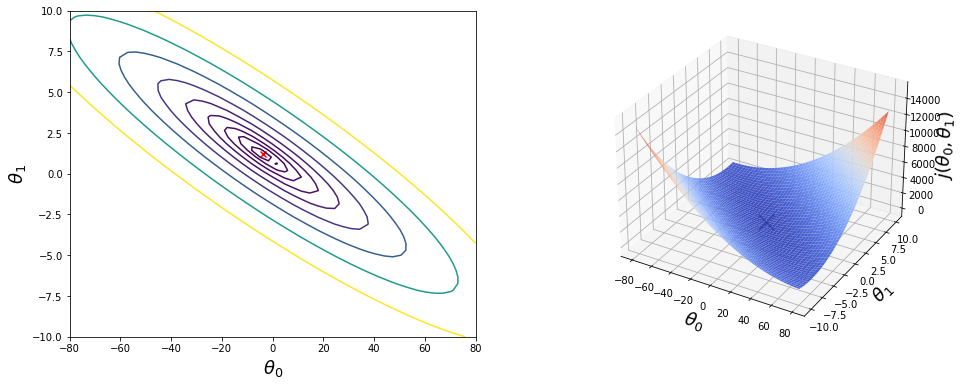

In [32]:
fig = plt.figure(figsize = (16,6))

ax1 = fig.add_subplot(121)
ax1.contour(xx,yy,z, np.logspace(-2,3,20))
ax1.scatter(theta_history[-1][0], theta_history[-1][1], color = 'r', marker = 'x')
ax1.set_xlabel(r'$\theta_0$', fontsize ='18')
ax1.set_ylabel(r'$\theta_1$', fontsize ='18')

ax2 = fig.add_subplot(122, projection = '3d')
ax2.scatter(theta_history[-1][0], theta_history[-1][1], color = 'black', marker = 'x', s=250)
ax2.plot_surface(xx,yy,z, cmap=cm.coolwarm)
ax2.set_xlabel(r'$\theta_0$', fontsize ='18')
ax2.set_ylabel(r'$\theta_1$', fontsize ='18')
ax2.set_zlabel(r'$j(\theta_0,\theta_1)$', fontsize ='18')

plt.show()

# Batch Gradient Descent(Vectorized)


**Vectorized** Cost Function

$$\large J(\theta) = \frac{1}{2m} (X\theta - Y)^{T} (X\theta - Y)$$

$$\large \theta := \theta - \frac{\alpha}{m}X^{T}(X\theta - Y) $$


In [33]:
def gradientDescentVectorized(x, y, theta = np.zeros((x.shape[1],1)), alpha = 0.003, max_iters = 20000, early = False, epsilon = 0.00001):
    
    m = x.shape[0]

    J_history = np.zeros((max_iters,1))
    theta_history = []

    theta_gd = np.copy(theta)
    
    elapsed_time = 0
    elapsed_time -= time.time()

    for iter in range (max_iters):
        J_history[iter],_ = costVectorial(x,y, theta = theta_gd)
        
        theta_gd = theta_gd - (alpha/m) *x.T.dot(x.dot(theta_gd) - y)
        theta_history.append(np.copy(theta_gd))        
        
        if(early):
            if(iter != 0):
                if(np.abs(J_history[iter] - J_history[iter-1]) < epsilon):
                        theta_history.append(theta_gd)
                        elapsed_time += time.time()
                        elapsed_time *= 1000 # porto i secondi in millisecondi
                        return theta_gd, J_history[J_history != 0], round(elapsed_time,3), theta_history
    
    theta_history.append(np.copy(theta_gd))
    elapsed_time += time.time()
    elapsed_time *= 1000 # porto i secondi in millisecondi

    return theta_gd, J_history, round(elapsed_time,3), theta_history
    

In [173]:
theta_gd, cost_history, gd_elapsed_time, theta_history= gradientDescentLoop(x,y,theta = np.zeros((x.shape[1], 1)))
theta_gd_vectorized, cost_history_vectorized, gd_elapsed_time_vectorized, theta_history_vectorized = gradientDescentVectorized(x, y, theta = np.zeros((x.shape[1], 1)))



In [186]:
print('costi:')
print(cost_history[-1][0],cost_history_vectorized[-1][0])
print('tempi:')
print(gd_elapsed_time, gd_elapsed_time_vectorized)


costi:
4.477 4.477
tempi:
47419.66 502.038
